# Preprocessing


Useful imports

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing and visualizing the dataset

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
df=pd.DataFrame(data=data.data, columns=data.feature_names)

## Visualization

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Plotting

Box plots for each column

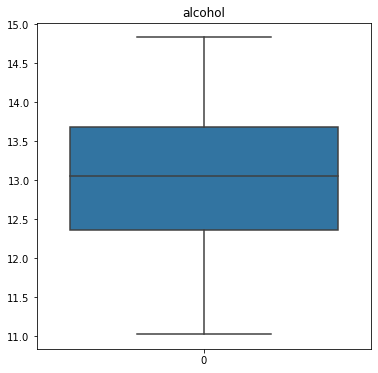

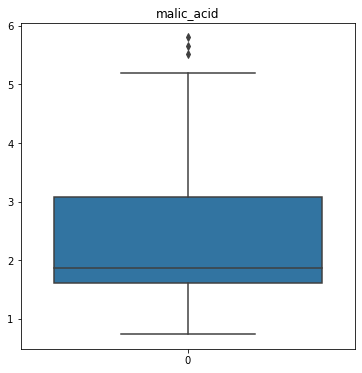

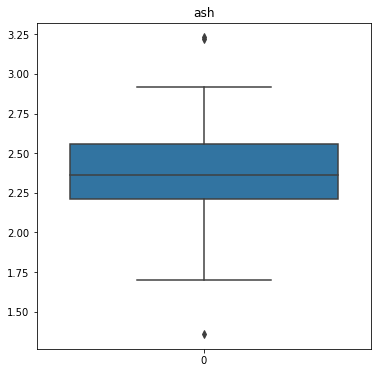

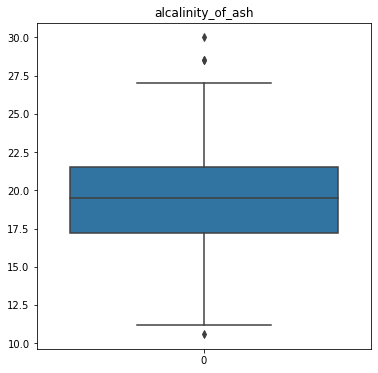

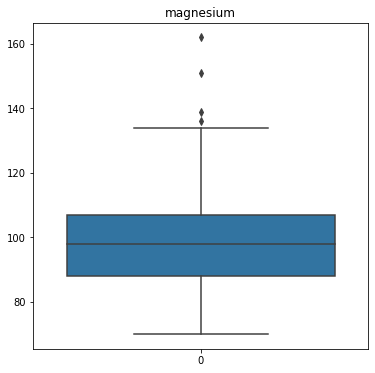

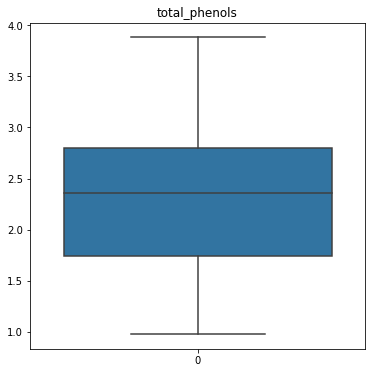

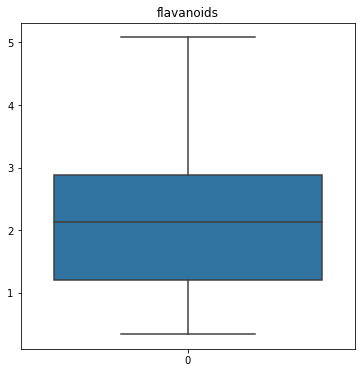

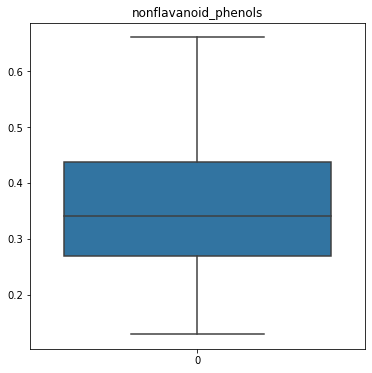

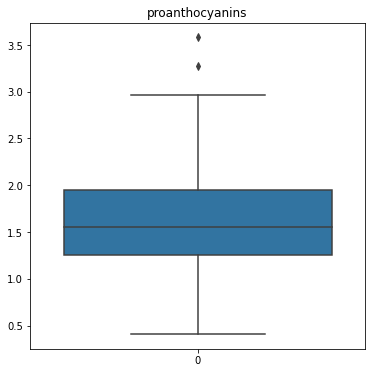

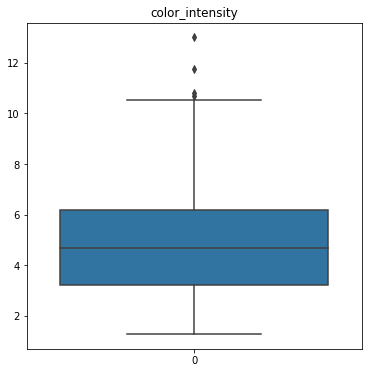

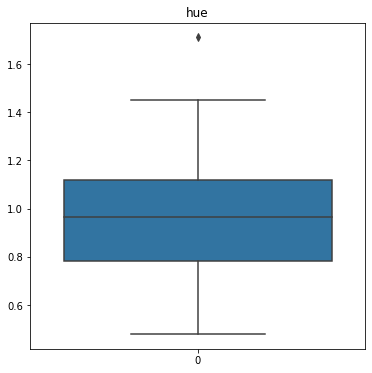

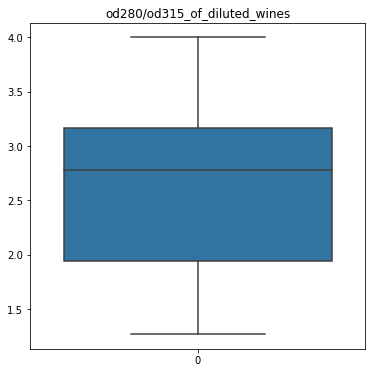

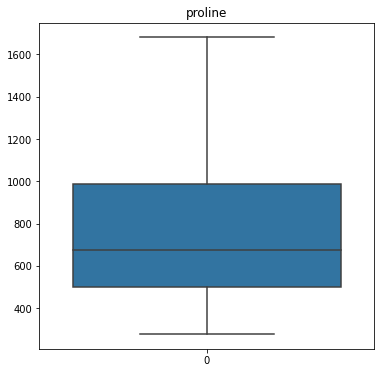

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(6,6))
  ax = sns.boxplot(data=df[column]) 
  plt.title(column)
  plt.show()

Comulative box Plots for each column 

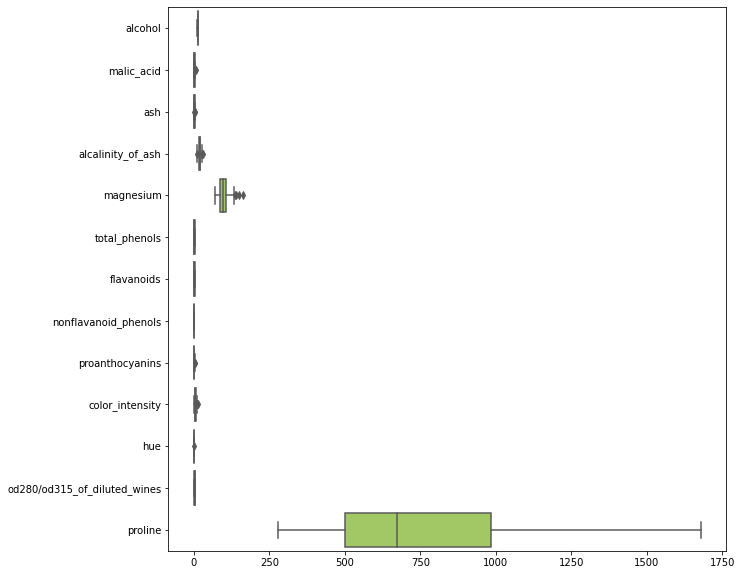

In [8]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

## Scaling

### Standard Scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [9]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(scaler.mean_)
print(data)

[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


### Robust Scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [10]:
from sklearn.preprocessing import RobustScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
data = RobustScaler().fit_transform(data)

print(data)

[[-0.5 -0.5]
 [-0.5 -0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]]


### MinMax Scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [11]:
from sklearn.preprocessing import MinMaxScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
data = MinMaxScaler().fit_transform(data)
print(data)

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]


## Features Engineering

#### One Hot Encoding

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [12]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [13]:
print("Original features:\n", list(demo_df.columns), "\n") 

data_dummies = pd.get_dummies(demo_df)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Integer Feature', 'Categorical Feature'] 

Features after get_dummies:
 ['Integer Feature', 'Categorical Feature_box', 'Categorical Feature_fox', 'Categorical Feature_socks']


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(demo_df)

OneHotEncoder(handle_unknown='ignore')

#### Encoding with Replace

Replace a categorical value with a specific numeric one

In [15]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

dictionary={"Categorical Feature": {"socks":0, "fox":1, "box":2}}
demo_df.replace(dictionary, inplace=True)
# df_result = demo_df.replace(dictionary) # example without inplace=True
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature,Categorical Feature
0,0,0
1,1,1
2,2,0
3,1,2


#### Label Encoder
Substituting the index of the label value

In [16]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df.dtypes

Integer Feature         int64
Categorical Feature    object
dtype: object

In [17]:
demo_df["Categorical Feature_cat"] = demo_df["Categorical Feature"].astype('category')
demo_df.dtypes

Integer Feature               int64
Categorical Feature          object
Categorical Feature_cat    category
dtype: object

In [18]:
# encoding
demo_df["Categorical Feature_cat"] = demo_df["Categorical Feature_cat"].cat.codes 
display(demo_df)

,Integer Feature,Categorical Feature,Categorical Feature_cat
0,0,socks,2
1,1,fox,1
2,2,socks,2
3,1,box,0


Label encoder is also available on sklearn

In [19]:
from sklearn.preprocessing import LabelEncoder

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

lb_make = LabelEncoder()
demo_df["Categorical Feature"] = lb_make.fit_transform(demo_df["Categorical Feature"])
display(demo_df)

,Integer Feature,Categorical Feature
0,0,2
1,1,1
2,2,2
3,1,0


When I have a lot of outliers I use the median to calculate the missing values. This is because the mean would be made useless by the values of the outliers

Robust Scaler

In [20]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df.values)
scaled_data = transformer.transform(df.values)
df_scaled=pd.DataFrame(data=scaled_data, columns=df.columns)

Import Dataset From URL to Pandas


In [21]:
import pandas as pd

# ignore if not read from url
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# url"data/breast-cancer-wisconsin.data"

df = pd.read_csv(url, header=None) #file contains no header info
print(f"Read in {len(df)} rows")
df.head()

Read in 699 rows


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Batch Gradient Descent (NOT SKLearn)

In [22]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100

theta = np.random.randn(2,1) # random initialization <2x1>

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients

NameError: name 'X_b' is not defined

# Models

Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
 
confusion = confusion_matrix(y_test, rf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

NameError: name 'y_test' is not defined

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Holdout methodology
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import classification_report

print("Train accuracy: {}".format(rf.score(X_train, y_train)))
print("Test accuracy: {}".format(rf.score(X_test, y_test)))

SVC

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=0)
svc = SVC().fit(X_train, y_train)

K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

## Cross Validation

Stratified KFold

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 

kfold = StratifiedKFold(n_splits=3)
rf = RandomForestClassifier(random_state=0)

print("Cross-validation scores:\n{}".format( cross_val_score(rf, X, y, cv=kfold)))

## GridSearch

In [ ]:
param_grid = {'max_features': [2, 3, 4, 5],
              'n_estimators': [50, 100, 150, 200]}
              
print("Parameter grid:\n{}".format(param_grid))

In [ ]:
from sklearn.model_selection import GridSearchCV 

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# New section

In [ ]:
def best_max_leaf_nodes_tree(max_nodes: int):
  best_tree = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)
  best_tree.fit(X_train, y_train)
  best_y_predict = best_tree.predict(X_test)
  best_nodes_count = 2

  for x in range(2, max_nodes):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=x, random_state=0)
    tree_clf.fit(X_train, y_train)
    y_predict = tree_clf.predict(X_test)
    if accuracy_score(y_test, y_predict) > accuracy_score(y_test, best_y_predict):
      best_tree = tree_clf
      best_y_predict = y_predict
      best_nodes_count = x
  
  print("Best number of leaf nodes: "+ str(best_nodes_count))
  print("With an accuracy of: " + str(accuracy_score(y_test, best_y_predict)))
  return best_tree 

# Column transformer

In [ ]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer([(OneHotEncoder(), ["some_column"]), (MinMaxScaler(), ["some columns"])], remainder="passthrough")
column_trans.fit_transform(df)  # returns a numpy array